# This is what an easy MCMC task looks like

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ndefault')
%matplotlib inline

In [2]:
from scipy.stats import norm, chi2
import emcee

This likelihood function should produce independently normal rvs.

In [3]:
def log_prob(x, mu):
    diff = x - mu
    return -0.5*np.dot(diff,diff)

In [4]:
ndim = 4
means = np.random.rand(ndim)

In [5]:
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

In [6]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means])

In [7]:
sampler.run_mcmc(p0,10000);
samples = sampler.get_chain(flat=True, thin=10, discard=1000)
lvals = sampler.get_log_prob(flat=True, thin=10, discard=1000)

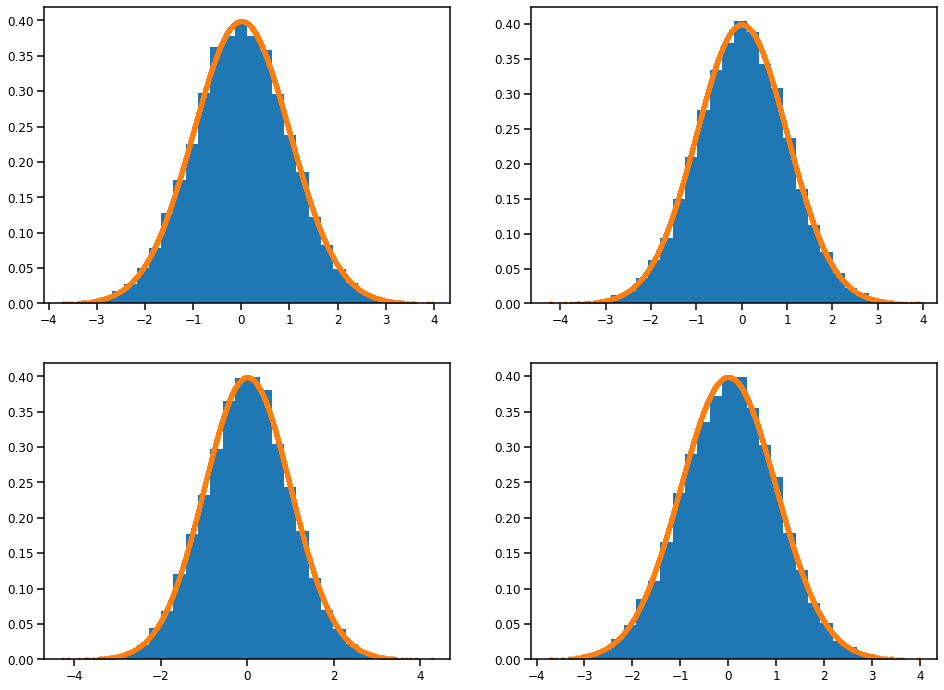

In [8]:
x1 = samples[:,0] - means[0]
x2 = samples[:,1] - means[1]
x3 = samples[:,2] - means[2]
x4 = samples[:,3] - means[3]

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.hist(x1, density=True);
plt.plot(x1, norm.pdf(x1), '.');
plt.subplot(2,2,2)
plt.hist(x2, density=True);
plt.plot(x2, norm.pdf(x2), '.')
plt.subplot(2,2,3);
plt.hist(x3, density=True);
plt.plot(x3, norm.pdf(x3), '.');
plt.subplot(2,2,4)
plt.hist(x4, density=True);
plt.plot(x4, norm.pdf(x4), '.');


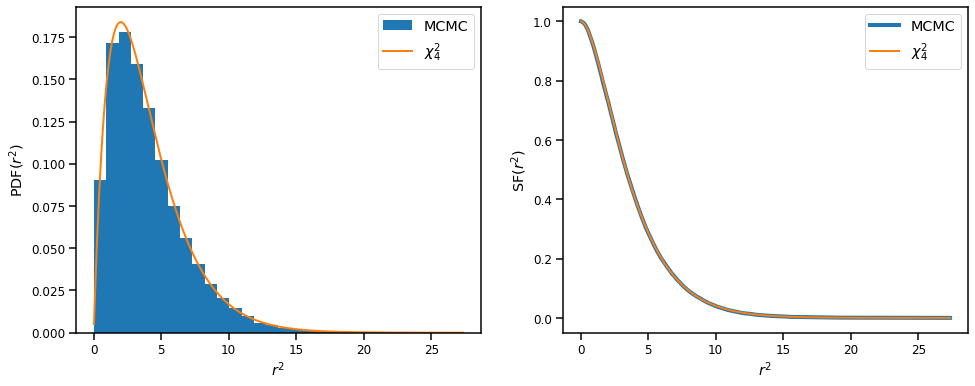

In [9]:
rvals = np.sqrt(-2*lvals);
N = rvals.size
ecdf = np.arange(1,N+1)/N # assuming no repeated values

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(rvals**2, density=True, label='MCMC');
plt.plot(np.sort(rvals**2), chi2.pdf(np.sort(rvals**2),4), label=r'$\chi^2_4$');
plt.xlabel('$r^2$');
plt.ylabel('PDF$(r^2)$');
plt.legend();

plt.subplot(1,2,2)
plt.plot(np.sort(rvals**2), 1 - ecdf, label='MCMC', linewidth=4);
plt.plot(np.sort(rvals**2), chi2.sf(np.sort(rvals**2),4), label=r'$\chi^2_4$');
plt.xlabel('$r^2$');
plt.ylabel('SF$(r^2)$');
plt.legend();